# Diabetes example

#### pip install scikit-learn 설치 필요

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split 
import numpy
seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt("diabetes.csv", delimiter=",")

X = dataset[:,0:8]
Y = dataset[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Modeling & Training

In [28]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam'
              , metrics=['acc'])
history = model.fit(X_train, y_train
                    , epochs=15, batch_size=10, verbose=1
                    , validation_split=0.2)

Train on 406 samples, validate on 102 samples
Epoch 1/15
406/406 [==============================] - 0s 667us/step - loss: 0.6915 - acc: 0.6108 - val_loss: 0.6869 - val_acc: 0.7157
Epoch 2/15
406/406 [==============================] - 0s 419us/step - loss: 0.6870 - acc: 0.6256 - val_loss: 0.6779 - val_acc: 0.7157
Epoch 3/15
406/406 [==============================] - 0s 409us/step - loss: 0.6784 - acc: 0.6256 - val_loss: 0.6618 - val_acc: 0.7157
Epoch 4/15
406/406 [==============================] - 0s 414us/step - loss: 0.6635 - acc: 0.6256 - val_loss: 0.6383 - val_acc: 0.7157
Epoch 5/15
406/406 [==============================] - 0s 394us/step - loss: 0.6379 - acc: 0.6281 - val_loss: 0.6011 - val_acc: 0.7353
Epoch 6/15
406/406 [==============================] - 0s 399us/step - loss: 0.6007 - acc: 0.6823 - val_loss: 0.5631 - val_acc: 0.7647
Epoch 7/15
406/406 [==============================] - 0s 394us/step - loss: 0.5616 - acc: 0.7241 - val_loss: 0.5363 - val_acc: 0.7647
Epoch 8/15
406/4

In [29]:
model.metrics_names

['loss', 'acc']

In [30]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

#  시각화

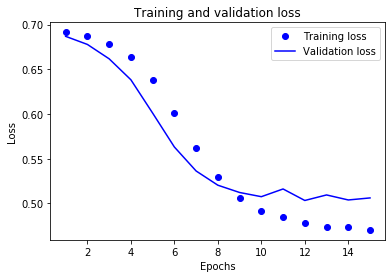

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

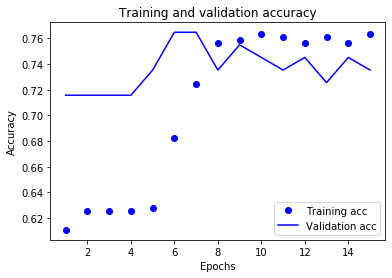

In [32]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### epoch=8 으로 변경후 다시 학습

In [37]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam'
              , metrics=['acc'])
history = model.fit(X_train, y_train
                    , epochs=8, batch_size=10, verbose=1
                    , validation_split=0.2)

Train on 406 samples, validate on 102 samples
Epoch 1/8
406/406 [==============================] - 0s 736us/step - loss: 0.6915 - acc: 0.6281 - val_loss: 0.6868 - val_acc: 0.7157
Epoch 2/8
406/406 [==============================] - 0s 414us/step - loss: 0.6856 - acc: 0.6256 - val_loss: 0.6732 - val_acc: 0.7157
Epoch 3/8
406/406 [==============================] - 0s 389us/step - loss: 0.6705 - acc: 0.6256 - val_loss: 0.6362 - val_acc: 0.7157
Epoch 4/8
406/406 [==============================] - 0s 468us/step - loss: 0.6442 - acc: 0.6256 - val_loss: 0.6015 - val_acc: 0.7157
Epoch 5/8
406/406 [==============================] - 0s 404us/step - loss: 0.6210 - acc: 0.6256 - val_loss: 0.5736 - val_acc: 0.7157
Epoch 6/8
406/406 [==============================] - 0s 360us/step - loss: 0.6010 - acc: 0.6256 - val_loss: 0.5570 - val_acc: 0.7157
Epoch 7/8
406/406 [==============================] - 0s 406us/step - loss: 0.5811 - acc: 0.6576 - val_loss: 0.5433 - val_acc: 0.7647
Epoch 8/8
406/406 [====

# Evaluation & Prediction

In [38]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]
print(rounded)

251/251 [==============================] - 0s 112us/step

acc: 75.70%
[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,